In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

import csv, sqlite3

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score



In [2]:
df = pd.read_csv('aus_real_estate.csv')

In [3]:
df.head()

,Price,Bedrooms,Bathrooms,SqFt,City,State,Year_Built,Type,Garage,Lot_Area
0,982112,4,1,1561,Adelaide,QLD,2021,Townhouse,0,1357
1,571388,3,2,3735,Melbourne,VIC,1999,House,1,8397
2,866821,5,1,2032,Sydney,VIC,1976,Townhouse,0,3478
3,1230977,4,3,3861,Brisbane,SA,1978,House,0,7619
4,241787,4,2,3150,Perth,SA,1992,Apartment,0,8324


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Price       5000 non-null   int64 
 1   Bedrooms    5000 non-null   int64 
 2   Bathrooms   5000 non-null   int64 
 3   SqFt        5000 non-null   int64 
 4   City        5000 non-null   object
 5   State       5000 non-null   object
 6   Year_Built  5000 non-null   int64 
 7   Type        5000 non-null   object
 8   Garage      5000 non-null   int64 
 9   Lot_Area    5000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 390.8+ KB


In [5]:
df.isnull().sum()

Price         0
Bedrooms      0
Bathrooms     0
SqFt          0
City          0
State         0
Year_Built    0
Type          0
Garage        0
Lot_Area      0
dtype: int64

In [6]:
len(df)

df.head()

,Price,Bedrooms,Bathrooms,SqFt,City,State,Year_Built,Type,Garage,Lot_Area
0,982112,4,1,1561,Adelaide,QLD,2021,Townhouse,0,1357
1,571388,3,2,3735,Melbourne,VIC,1999,House,1,8397
2,866821,5,1,2032,Sydney,VIC,1976,Townhouse,0,3478
3,1230977,4,3,3861,Brisbane,SA,1978,House,0,7619
4,241787,4,2,3150,Perth,SA,1992,Apartment,0,8324


In [7]:
df_cleaned = df.dropna()

In [8]:
len(df_cleaned)

5000

In [9]:
max_value =  df_cleaned['Price'].max()
max_value

1999701

In [111]:
import pandas as pd
import numpy as np

def filter_df(df):

    excluded_cities = ['Sydney', 'Melbourne', 'Brisbane']

    filtered_df = df[~df['City'].isin(excluded_cities)]

    return filtered_df

df_cleaned_filtered = filter_df(df_cleaned)

df_cleaned_filtered['PriceSegment'] = pd.cut(df_cleaned_filtered['Price'],
                                            bins=[0, 5000, 100000, 1000000, np.inf],
                                            labels=['Affordable', 'Mid-range', 'High-end', 'Luxury'])

state_area = ['WA', 'SA', 'NSW']
df_country = df_cleaned_filtered[df_cleaned_filtered['State'].isin(state_area)]



C:\Users\Dell\AppData\Local\Temp\ipykernel_11780\3131676977.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned_filtered['PriceSegment'] = pd.cut(df_cleaned_filtered['Price'],


**NOTE**
1. **South Australia** – SA 
2. **Western Australia** – WA
3. **New South Wales** – NSW

In [112]:
df_country = df_country[['City','State','SqFt','Bedrooms','Bathrooms','Price','PriceSegment']]
df_country

,City,State,SqFt,Bedrooms,Bathrooms,Price,PriceSegment
4,Perth,SA,3150,4,2,241787,High-end
19,Adelaide,NSW,1233,5,1,1731191,Luxury
24,Perth,NSW,2602,5,1,983015,High-end
28,Perth,WA,2189,2,1,671877,High-end
29,Perth,NSW,2566,5,1,402195,High-end
...,...,...,...,...,...,...,...
4978,Adelaide,SA,2181,2,2,552497,High-end
4983,Perth,NSW,2498,4,3,1345517,Luxury
4986,Adelaide,SA,2519,5,3,1482776,Luxury
4988,Perth,NSW,2971,1,1,1992719,Luxury


In [113]:
con = sqlite3.connect('AU_HousePrice.db')
cur = con.cursor()

In [114]:
%load_ext sql 

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


In [115]:
%sql sqlite:///AU_HousePrice.db

In [116]:
df_country.to_sql('CountryArea',con,if_exists = 'replace',index = False)

1198

In [117]:
%%sql 
SELECT *
FROM CountryArea
WHERE [Price] >= 1000000

 * sqlite:///AU_HousePrice.db
Done.


City,State,SqFt,Bedrooms,Bathrooms,Price,PriceSegment
Adelaide,NSW,1233,5,1,1731191,Luxury
Adelaide,SA,2960,4,3,1466299,Luxury
Adelaide,WA,1913,1,2,1166930,Luxury
Adelaide,NSW,1925,1,3,1140310,Luxury
Perth,WA,1291,5,2,1780590,Luxury
Adelaide,NSW,2875,3,3,1473547,Luxury
Adelaide,NSW,1321,3,2,1539822,Luxury
Adelaide,SA,3267,1,3,1631920,Luxury
Perth,SA,944,1,1,1849535,Luxury
Perth,NSW,3069,3,1,1936294,Luxury


In [118]:
con.close()

# Phân tích giá nhà tại các khu vực thành phố lớn

In [119]:
stats = df_country.describe()
print("Thống kê mô tả tổng quát cho giá bất động sản")
print(stats.to_string(float_format='{:.2f}'.format))

Thống kê mô tả tổng quát cho giá bất động sản
         SqFt  Bedrooms  Bathrooms      Price
count 1198.00   1198.00    1198.00    1198.00
mean  2396.86      2.90       1.99 1035748.33
std    917.90      1.45       0.83  542652.90
min    800.00      1.00       1.00  100028.00
25%   1602.00      2.00       1.00  582899.25
50%   2437.50      3.00       2.00 1005045.00
75%   3161.25      4.00       3.00 1494272.50
max   3998.00      5.00       3.00 1998165.00


In [120]:
# Độ biến thiên giá theo khu vực
Price_variance_by_location = df_country.groupby('State')['Price'].var()

print(Price_variance_by_location.to_string(float_format='{:.2f}'.format))

State
NSW   284774481026.13
SA    298531144186.51
WA    301156093327.40


In [148]:
# Số lượng bất động sản theo khu vực

count_by_City = df_country['City'].value_counts()
count_by_City

City
Adelaide    611
Perth       587
Name: count, dtype: int64

In [122]:
# Hệ số biến thiên giá (coeefficient of variation) 
cv = df_country['Price'].std() / df_country['Price'].mean()
cv

0.5239235132848272

In [123]:
# Độ phân tán giá
Price_range = df_country['Price'].max() - df_country['Price'].min()

Price_range

1898137

In [124]:
Q1 = df_country['Price'].quantile(0.25)
Q3 = df_country['Price'].quantile(0.75)

IQR = Q3 - Q1 

outliers = df_country[(df_country['Price'] < (Q1 - 1.5 * IQR)) | (df_country['Price'] > (Q3 + 1.5 * IQR))]

outliers

,City,State,SqFt,Bedrooms,Bathrooms,Price,PriceSegment


In [125]:
# Độ lệch trung bình tuyệt đối (mean absolute deviation)
Price_data = df_country['Price']
mean_Price = Price_data.mean()

mad = (Price_data - mean_Price).abs().mean()

mad


466875.43339622795

In [126]:
# Tần suất xuất hiện của giá (frequency analysis)
frequency = df_country['PriceSegment'].value_counts()
frequency

PriceSegment
Luxury        604
High-end      594
Affordable      0
Mid-range       0
Name: count, dtype: int64

In [127]:
# Hệ số tương quan giữa gía và diện tích
corr_Price_area = df_country['Price'].corr(df_country['SqFt'])
corr_Price_area

0.02244708536019189

In [128]:
# Hệ số tương quan giữa giá và phòng ngủ
corr_Price_Bedrooms = df_country['Price'].corr(df_country['Bedrooms'])
corr_Price_Bedrooms

0.00836182054551643

In [129]:
# Hệ số tương quan giữa vùng 
mean_Price_by_location = df_country.groupby('State')['Price'].mean()
print(mean_Price_by_location.to_string(float_format='{:.2f}'.format))

State
NSW   1024748.87
SA    1068727.16
WA    1014521.96


In [130]:
Q1 = df_country['Price'].quantile(0.25)
Q3 = df_country['Price'].quantile(0.75)

IQR = Q3 - Q1 

outliers = df_country[(df_country['Price'] < (Q1 - 1.5 * IQR)) | (df_country['Price'] > (Q3 + 1.5 * IQR))]

outliers

,City,State,SqFt,Bedrooms,Bathrooms,Price,PriceSegment


In [131]:
outliers_upper = df_country[df_country['Price'] > (Q3 + 1.5 * IQR)]
outliers_lower = df_country[df_country['Price'] < (Q1 - 1.5 * IQR)]
print(f'Outliers upper : {outliers_upper}')
print(f'Outliers lower : {outliers_lower}')

Outliers upper : Empty DataFrame
Columns: [City, State, SqFt, Bedrooms, Bathrooms, Price, PriceSegment]
Index: []
Outliers lower : Empty DataFrame
Columns: [City, State, SqFt, Bedrooms, Bathrooms, Price, PriceSegment]
Index: []


In [132]:
Price_quantiles = df_country['Price'].quantile([0.25,0.5,0.7,1.0])
Price_quantiles

0.25     582899.25
0.50    1005045.00
0.70    1399558.40
1.00    1998165.00
Name: Price, dtype: float64

# Data Visualization

In [133]:
df_country.head()

,City,State,SqFt,Bedrooms,Bathrooms,Price,PriceSegment
4,Perth,SA,3150,4,2,241787,High-end
19,Adelaide,NSW,1233,5,1,1731191,Luxury
24,Perth,NSW,2602,5,1,983015,High-end
28,Perth,WA,2189,2,1,671877,High-end
29,Perth,NSW,2566,5,1,402195,High-end


Text(0, 0.5, 'Giá BĐS trung bình (USD')

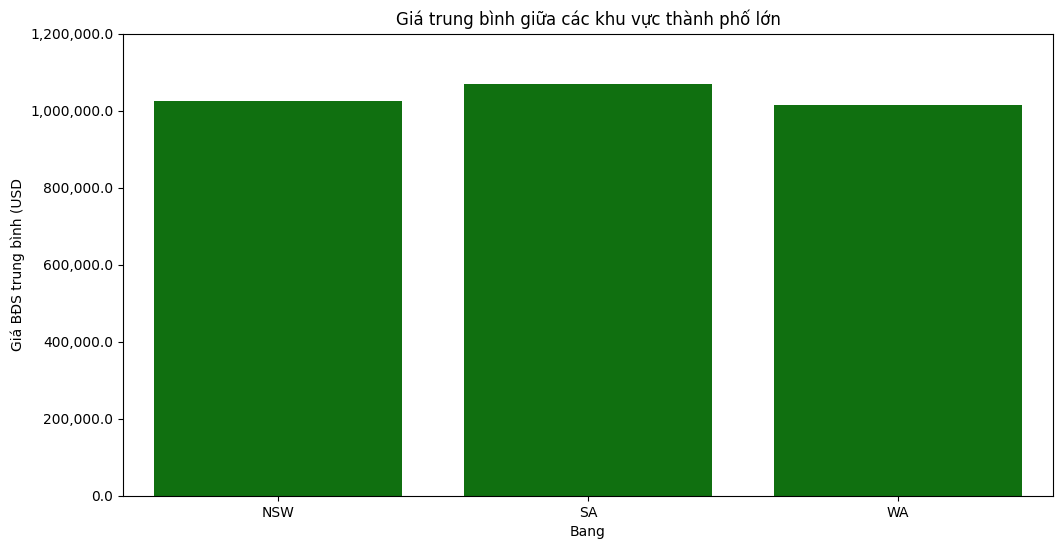

In [134]:
average_State = df_country.groupby('State')['Price'].mean()

plt.figure(figsize =(12,6))
sns.barplot(x =average_State.index, y =average_State.values, color = 'green')

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(1):,.1f}' for tick in yticks])

plt.title('Giá trung bình giữa các khu vực thành phố lớn')
plt.xlabel('Bang')
plt.ylabel('Giá BĐS trung bình (USD')

Text(0, 0.5, 'USD')

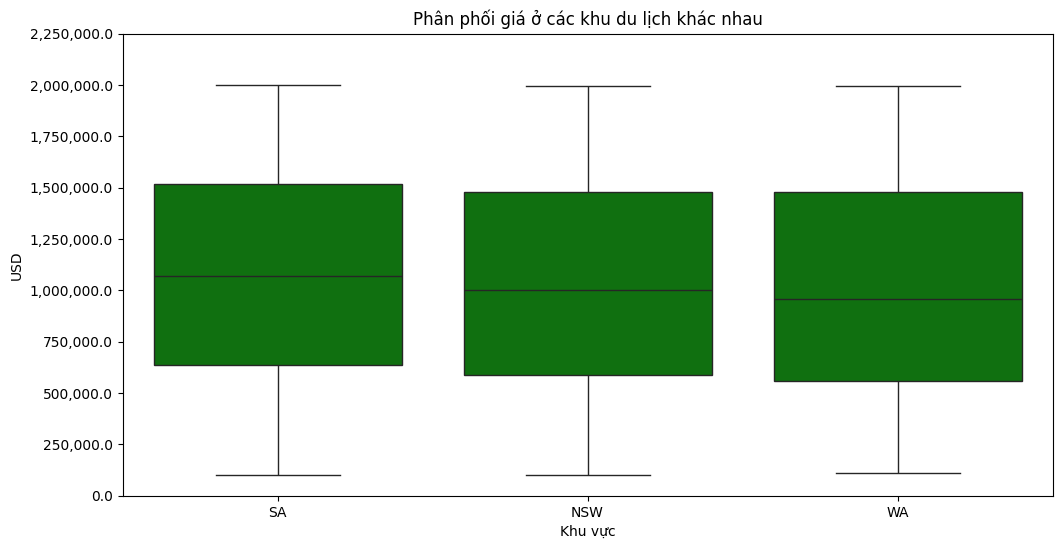

In [135]:
plt.figure(figsize = (12,6))
sns.boxplot(x = 'State', y = 'Price', data = df_country, color = 'Green')

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(1):,.1f}' for tick in yticks])


plt.title('Phân phối giá ở các khu du lịch khác nhau')
plt.xlabel('Khu vực')
plt.ylabel('USD')

''

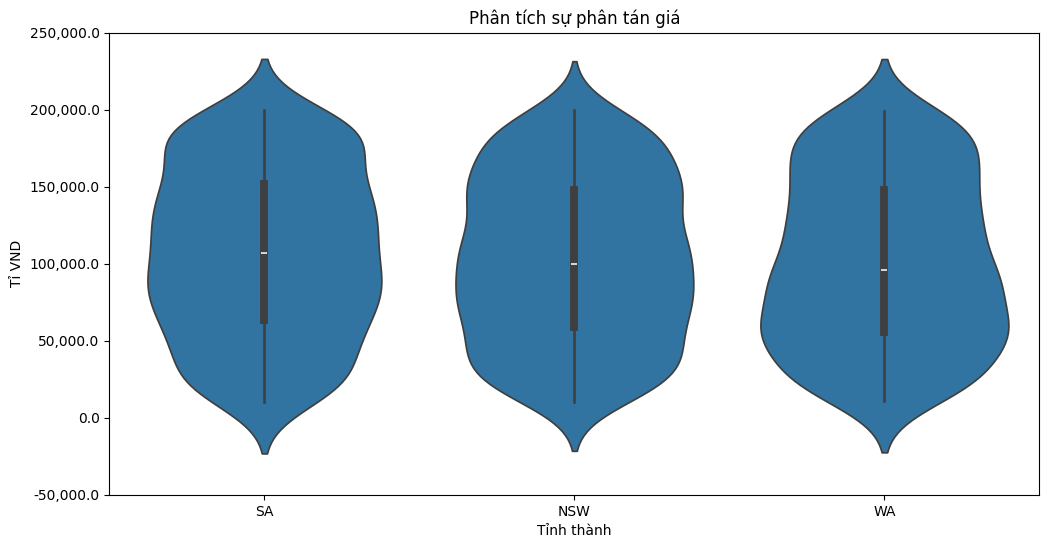

In [136]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='State', y='Price', data=df_country)

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick)/(10*(1)):,.1f}' for tick in yticks])

plt.title('Phân tích sự phân tán giá')
plt.xlabel('Tỉnh thành')
plt.ylabel('Tỉ VND')
;

Text(0, 0.5, 'Giá USD')

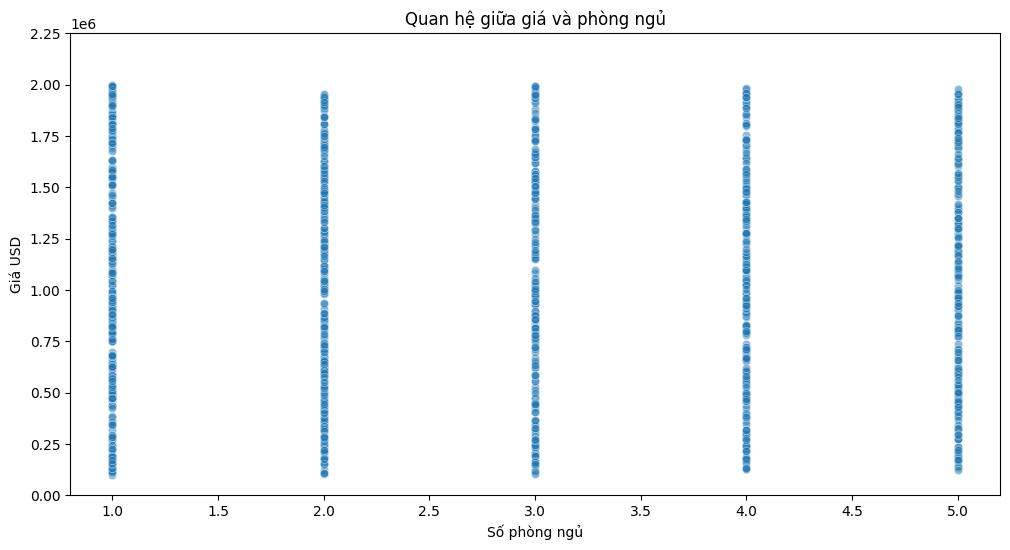

In [137]:
plt.figure(figsize = (12,6))
sns.scatterplot(x='Bedrooms', y='Price', data=df_country, alpha=0.5)

yticks = plt.yticks()[0]
plt.yticks(yticks,label = [f'{float(tick) / (10):,.1f}' for tick in yticks])

plt.title('Quan hệ giữa giá và phòng ngủ')

plt.xlabel('Số phòng ngủ')
plt.ylabel('Giá USD')

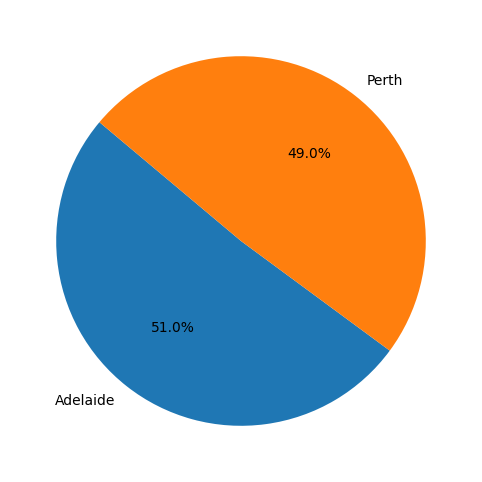

In [138]:
real_eState_counts = df_country['City'].value_counts()

plt.figure(figsize = (12,6))
plt.pie(real_eState_counts, labels = real_eState_counts.index, autopct ='%1.1f%%', startangle = 140);

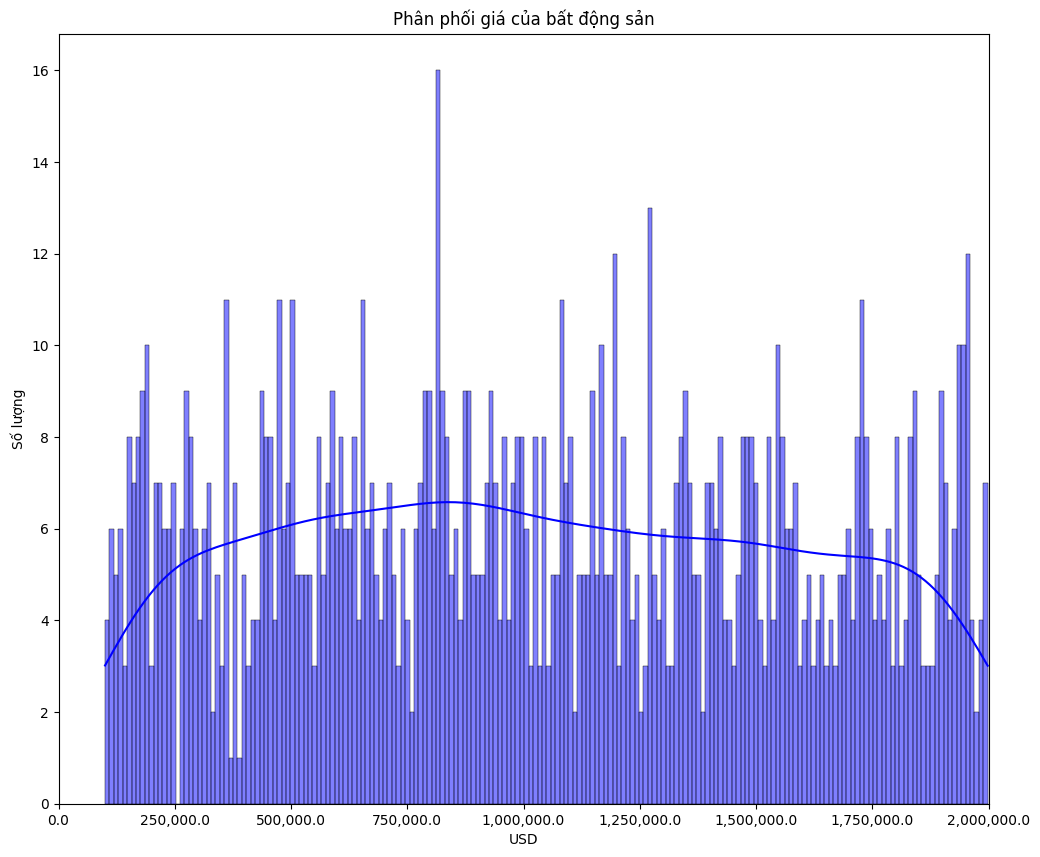

In [139]:
plt.figure(figsize=(12, 10))
sns.histplot(df_country['Price'], kde=True, color='blue',bins = 200)

xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick):,.1f}' for tick in xticks])
plt.xlim(0)
plt.xlim(0,2000000)

plt.title('Phân phối giá của bất động sản')
plt.xlabel('USD')
plt.ylabel('Số lượng');

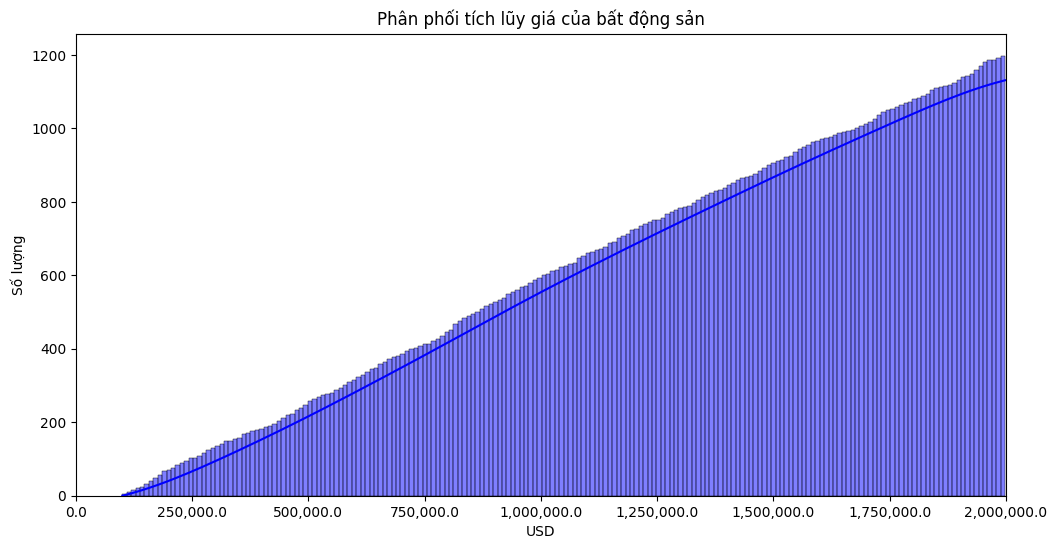

In [140]:
plt.figure(figsize=(12, 6))
sns.histplot(df_country['Price'], kde=True, color='blue', cumulative=True, bins=200)

xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick):,.1f}' for tick in xticks])
plt.xlim(0,2000000)

plt.title('Phân phối tích lũy giá của bất động sản')
plt.xlabel('USD')
plt.ylabel('Số lượng');

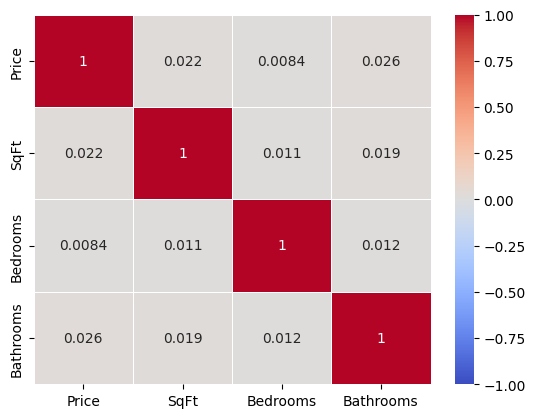

In [141]:
# Heatmap: Tương quan giữa giá và các yếu tố khác.
corr_matrix = df_country[['Price', 'SqFt','Bedrooms', 'Bathrooms']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5);

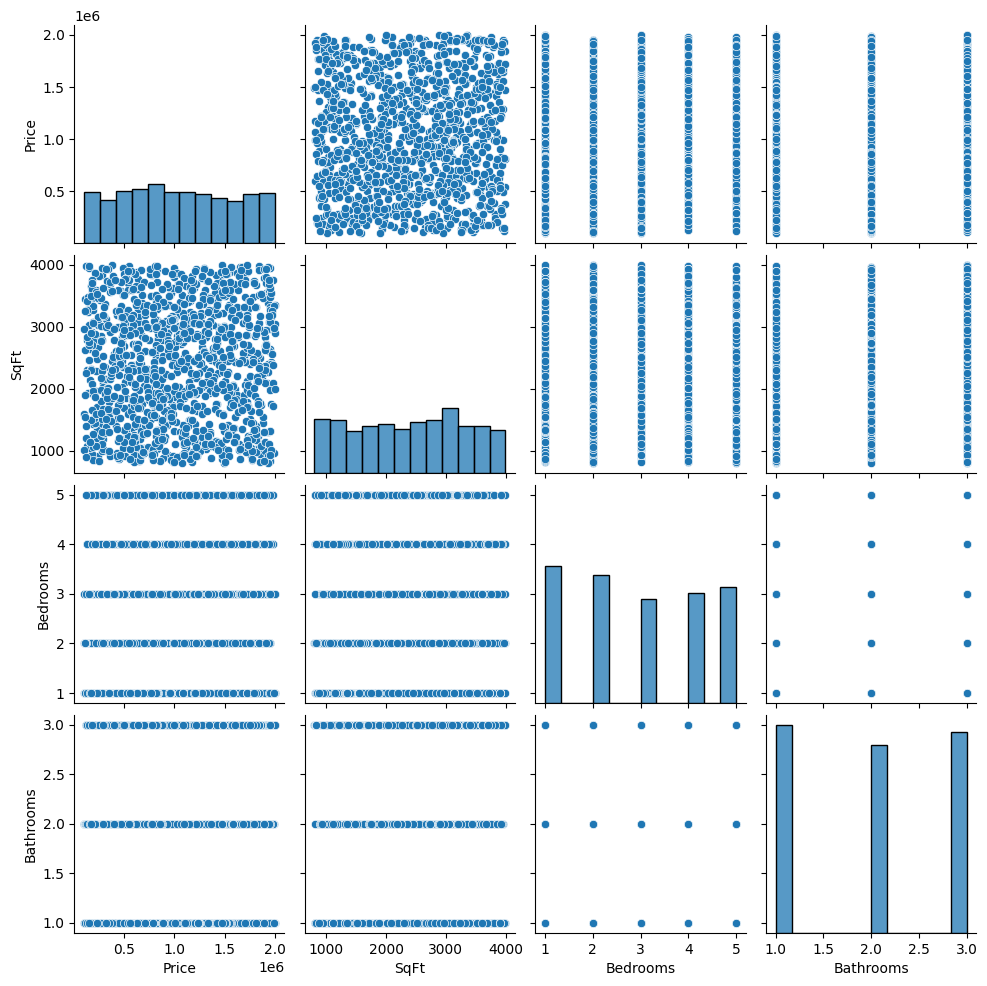

In [142]:
sns.pairplot(df_country[['Price', 'SqFt','Bedrooms', 'Bathrooms']]);

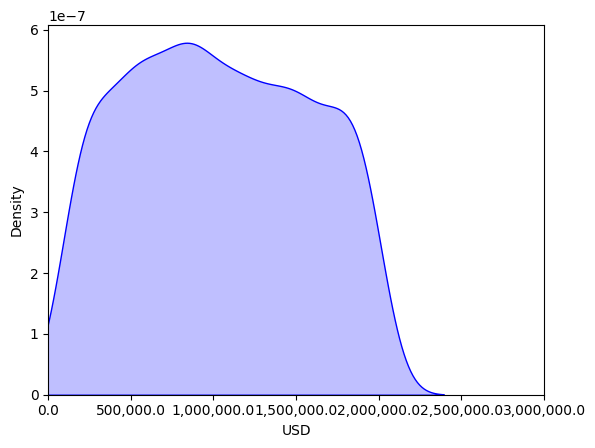

In [143]:
sns.kdeplot(df_country['Price'], color='blue', fill=True)

xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick):,.1f}' for tick in xticks])
plt.xlim(0)

plt.xlabel('USD');

''

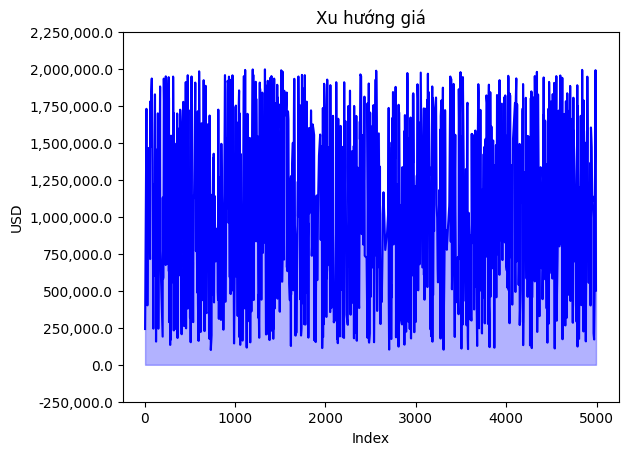

In [144]:
sns.lineplot(data=df_country['Price'], color='blue')
plt.fill_between(df_country.index, df_country['Price'], color='blue', alpha=0.3)

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick):,.1f}' for tick in yticks])

plt.title('Xu hướng giá')
plt.xlabel('Index')
plt.ylabel('USD')
;


''

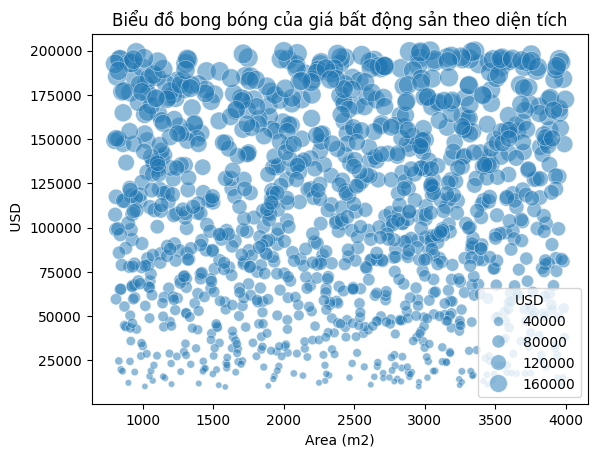

In [145]:
Price_billion = df_country['Price'].apply(lambda x: x/(10))

sns.scatterplot(x=df_country.SqFt, y=Price_billion, size=Price_billion, sizes=(20, 200), alpha=0.5)

plt.title('Biểu đồ bong bóng của giá bất động sản theo diện tích')
plt.xlabel('Area (m2)')
plt.ylabel(' USD')

plt.legend(title='USD', fontsize='10')

;

In [146]:
# Huấn luyện mô hình
X = df_country[['SqFt', 'Bedrooms', 'Bathrooms']]
Y = df_country[['Price']]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, Y_train)
Price_predictions = model.predict(X_test)

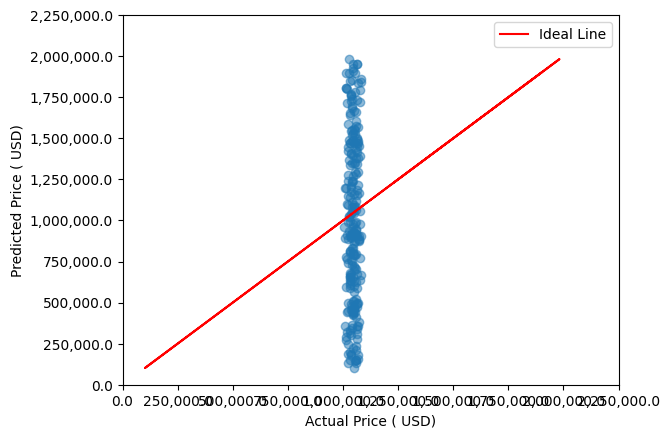

In [147]:
# Visualize khả năng dự đoán
plt.scatter(x=Price_predictions, y=Y_test.values, alpha=0.5)
plt.plot(Y_test.values, Y_test.values, color='red', label='Ideal Line')

plt.ylabel('Predicted Price ( USD)')
plt.xlabel('Actual Price ( USD)')
plt.legend()

xticks = plt.xticks()[0]
plt.xticks(xticks, labels=[f'{float(tick):,.1f}' for tick in xticks])

yticks = plt.yticks()[0]
plt.yticks(yticks, labels=[f'{float(tick):,.1f}' for tick in yticks]);